# Analysis of "not valid before" attributes in client certificates

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math
import datetime
%matplotlib inline

In [4]:
locale="EN_US"
no_v_rtts = np.loadtxt("2_certificates_valid_from_all.sh.csv", delimiter=",",dtype="str")
all_date = list()
for i in range(0,len(no_v_rtts)):
    all_date.append(datetime.datetime.strptime(no_v_rtts[i], 'b\'%b %d %H:%M:%S %Y GMT\''))
    
all_sort=np.sort(all_date)

In [5]:
locale="EN_US"
no_v_rtts = np.loadtxt("2_certificates_valid_from_macos.sh.csv", delimiter=",",dtype="str")
all_date = list()
for i in range(0,len(no_v_rtts)):
    all_date.append(datetime.datetime.strptime(no_v_rtts[i], 'b\'%b %d %H:%M:%S %Y GMT\''))
    
macos_sort=np.sort(all_date)

In [6]:
locale="EN_US"
no_v_rtts = np.loadtxt("2_certificates_valid_from_ios.sh.csv", delimiter=",",dtype="str")
all_date = list()
for i in range(0,len(no_v_rtts)):
    all_date.append(datetime.datetime.strptime(no_v_rtts[i], 'b\'%b %d %H:%M:%S %Y GMT\''))
    
ios_sort=np.sort(all_date)

## Plot definitions

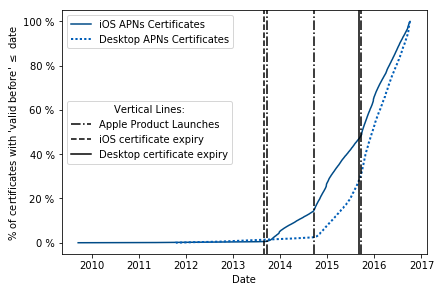

In [7]:
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="##e87722"

ylabel = "% of certificates with \'valid before\' $\leq$ date"
xlabel = "Date"
xmin = 0
ymin = 0
path = "./"

# CDF:
yvals_ios= np.arange(len(ios_sort))/float(len(ios_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(ios_sort, yvals_ios, label="iOS APNs Certificates",color=TUMDarkerBlue,linestyle="-")

# CDF:
yvals= np.arange(len(all_sort))/float(len(all_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
#plt.plot(all_sort, yvals, label="All APNS Certificates",color=TUMLighterBlue)

# CDF:
yvals_macos= np.arange(len(macos_sort))/float(len(macos_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(macos_sort, yvals_macos, label="Desktop APNs Certificates",color=TUMBlue,linestyle=":", linewidth=2)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
#plt.xscale("log")
plt.ylabel(ylabel)
plt.xlabel(xlabel)
first_legend = plt.legend(loc='upper left')#,prop={'size':11})
ax = plt.gca().add_artist(first_legend)

# end of september product announcement markers
prod = plt.axvline(datetime.date(2015, 9, 22), ymax=1, linestyle='-.', color='k', label="Apple Product Launches") # vertical lines
plt.axvline(datetime.date(2014, 9, 22), ymax=1, linestyle='-.', color='k') # vertical lines
plt.axvline(datetime.date(2013, 9, 22), ymax=1, linestyle='-.', color='k') # vertical lines
# expiry markers
macosexp = plt.axvline(datetime.date(2015, 9, 1), ymax=1, linestyle='-', color='k', label="Desktop certificate expiry") # vertical lines
iosexp = plt.axvline(datetime.date(2013, 9, 1), ymax=1, linestyle='--', color='k', label="iOS certificate expiry") # vertical lines

plt.legend(handles=[prod, iosexp, macosexp], loc='center left', title="Vertical Lines:")

plt.gcf().subplots_adjust(bottom=0.125,right=0.97,left=0.125,top=0.97)
plt.savefig('certs_valid_from.pdf', format='pdf', dpi=2000)    
plt.show()

In [8]:
%%bash
pdfcrop certs_valid_from.pdf
rm certs_valid_from.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `certs_valid_from-crop.pdf'.


# Count of invalid certificates 

In [11]:
ios_sort[218] # this and the next index were manually determined
print("iOS certificates expired (i.e. issued before 1.9.2013): {}\%".format(yvals_ios[218]))

iOS certificates expired (i.e. issued before 1.9.2013): 0.5407684865924144\%


In [12]:
macos_sort[4370]
print("desktop certificates expired (i.e. issued before 1.9.2015): {}\%".format(yvals_macos[4370]))

desktop certificates expired (i.e. issued before 1.9.2015): 27.631994941511223\%
